In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
data_path = "D:\\Prodigy\\proj3\\dogs-vs-cats\\train - Copy"

In [8]:
def load_data(path):
    images = []
    labels = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            image_path = os.path.join(path, folder, file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (180, 180))
            images.append(image)
            labels.append(folder)
    return np.array(images), np.array(labels)

In [9]:
X, y = load_data(data_path)

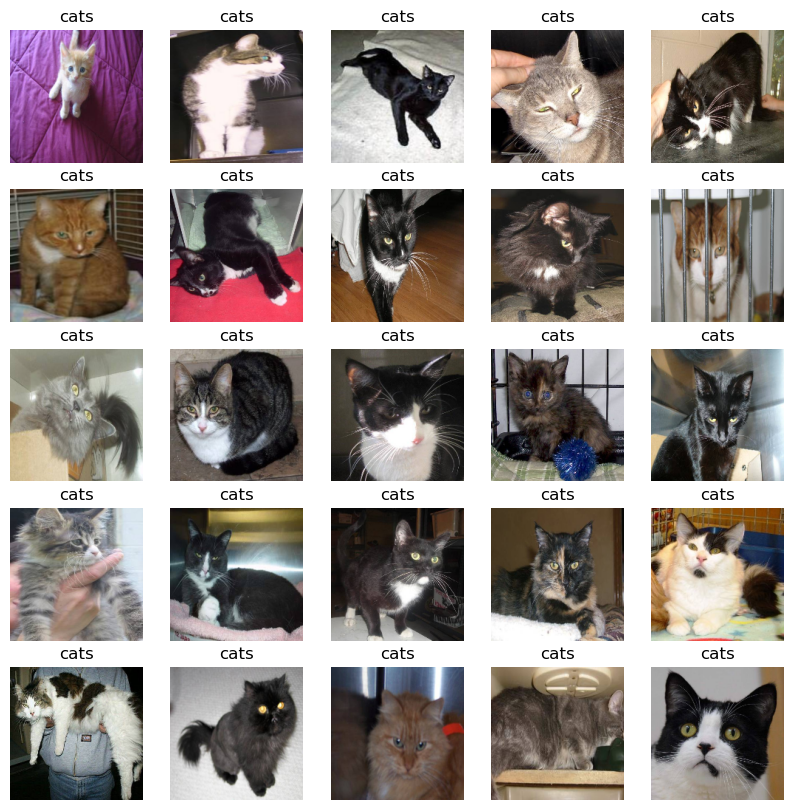

In [10]:
# Display some images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i+180])
    plt.title(y[i+180])
    plt.axis('off')
plt.show()

In [6]:
# Normalization
X = X/255

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Reshape images into 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [10]:
# Train SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [11]:
# Evaluate SVM model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}%')

Model accuracy: 0.65%


In [21]:
# Function to classify a new image
def classify_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (180, 180))
    image = image/255
    image = image.reshape(1, -1)
    prediction = svm_model.predict(image)
    label = le.inverse_transform(prediction)[0]
    print(f'The image is a {label}.')

In [26]:
image_path = "D:\\Prodigy\\proj3\\dogs-vs-cats\\test1\\10.jpg"
classify_image(image_path)

The image is a cats.
